In [1]:
import fns
from fns import *
from fns.functionsTFSubnets import *
%matplotlib inline
from tqdm import tnrange, tqdm_notebook

today = datetime.date.today()
todayStr = '%04d%02d%02d' % (today.year, today.month, today.day)
# todayStr = '20151005'
DIRECTORY = os.path.expanduser("~/Dropbox/0000_PhD/figures/"+todayStr+"/")
CSV_DIR_TODAY = os.path.expanduser("~/Dropbox/0000_PhD/csv/"+todayStr+"/")
CSV_DIR = os.path.expanduser("~/Dropbox/0000_PhD/csv/")
FIG_DIR = os.path.expanduser("~/Dropbox/0000_PhD/figures/")
if not os.path.exists(DIRECTORY):
    os.makedirs(DIRECTORY)
    
from bokeh.io import output_notebook
output_notebook()
from IPython.display import clear_output, Image, display

********************************************************************************
functionsTFsubnets loaded!
********************************************************************************


Loading BokehJS ...

In [2]:
def f():
    plt.figure(figsize=(20,3), linewidth=0.1)
    
def plotRaster(r):
    a = 17
    b = 3
    x,y = convertRaster(r.transpose())
    aspect = b/a
    fig  = plt.figure(figsize=(a,b))
    ax = fig.add_subplot(111)
    # ax.imshow(gpu1.raster[100:1100].transpose(), aspect=aspect)
    ax.plot(x,y, '.', color='black', alpha=1)
    
def norm(x):
    return x/np.max(x)

In [3]:
# def diag(W):
#     '''
#     Set diagonal elements to 0
#     '''
#     return W-np.diag(np.diag(W))

# class TfConnEvolveNet:
#     # DEVICE = '/gpu:0'

#     def __init__(self, N=400, 
#                  T=400, 
#                  disp=False, 
#                  spikeMonitor=False, 
#                  input=None, 
#                  tauv=15,
#                  sG=10, 
#                  device='/gpu:0', 
#                  both=False, 
#                  NUM_CORES=1, 
#                  g0=7, 
#                  startPlast=500, 
#                  nu=0, 
#                  memfraction=0.95,
#                  profiling=False
#                 ):
#         tf.reset_default_graph()
#         self.N = N
#         self.ratioNI = 0.2
#         self.NI = int(N * self.ratioNI)
#         self.NE = int(N - self.NI)
        
#         self.NE1 = self.NE
#         self.NE2 = self.NE
        
#         self.NI1 = self.NI
#         self.NI2 = self.NI
        
#         self.T = T
#         self.debug = False
#         self.disp = disp
#         self.spikeMonitor = spikeMonitor
#         self.tauv = tauv
         
#         self.device = device
#         self.both = both
#         self.initWGap = True
#         self.startPlast = startPlast
#         self.raster = []
#         self.showProgress = False
#         connectTime = 0
#         self.FACT = 10
#         self.ratio = 1
#         self.weight_step = 100
#         self.nu = nu
#         self.profiling = profiling
#         self.stabTime = 2000
        
#         self.inE = 100
#         self.k = 4
        
#         self.wEE1 = 1000
#         self.wEE2 = 1000
#         self.wE1E2 = 1000
#         self.wE2E1 = 1000
#         self.wEI1 = 1000
#         self.wEI2 = 1000
#         self.wIE1 = -2000
#         self.wIE2 = -2000
#         self.wII1 = -1000
#         self.wII2 = -1000
        
#         self.sG = sG
        
#         self.distrib='uniform'
#         self.mu = 1
#         self.sigma = 1

#         self.sess = tf.InteractiveSession(config=tf.ConfigProto(
#             log_device_placement=False,
#             inter_op_parallelism_threads=NUM_CORES,
#             intra_op_parallelism_threads=NUM_CORES,
#             device_count={'GPU': (device[:4] == '/gpu') * 1},
#             gpu_options=tf.GPUOptions(per_process_gpu_memory_fraction=memfraction,
#                                       allow_growth=False),
#         )
#         )
#         if input is None:
#             self.input = np.ones((T, 1), dtype='int32')

#     def DisplayArray(self, a, fmt='jpeg', rng=[0, 1], text=""):
#         """Display an array as a picture."""
#         a = (a - rng[0]) / float(rng[1] - rng[0]) * 255
#         a = np.uint8(np.clip(a, 0, 255))
#         f = BytesIO()
#         PIL.Image.fromarray(np.uint8(plt.cm.YlGnBu_r(a) * 255)).save(f, fmt)
#         display(Image(data=f.getvalue()))
#         print(text)
        
#     def makeVect(self):
        
#         NE1, NE2, NI1, NI2 = self.NE1, self.NE2, self.NI1, self.NI2
        
#         vConnE1 = np.concatenate([np.ones((NE1, 1)), np.zeros((NI1+NE2+NI2, 1))])
#         vConnI1 = np.concatenate([np.zeros((NE1,1)), np.ones((NI1, 1)), np.zeros((NE2+NI2, 1))])
#         vConnI2 = np.concatenate([np.zeros((NE1+NI1,1)), np.ones((NI2, 1)), np.zeros((NE2, 1))])
#         vConnE2 = np.concatenate([np.zeros((NE1+NI1+NI2,1)), np.ones((NE2,1))])
        
#         VE1 = tf.Variable(vConnE1, dtype='float32')
#         VE2 = tf.Variable(vConnE2, dtype='float32')
#         VI1 = tf.Variable(vConnI1, dtype='float32')
#         VI2 = tf.Variable(vConnI2, dtype='float32')

#         return VE1, VE2, VI1, VI2
    
#     def add_shared_gap(self, W_, n):
#         W = W_.copy()
#         NE1, NE2, NI1, NI2 = self.NE1, self.NE2, self.NI1, self.NI2
#         N1 = NE1 + NI1
#         N2 = NE2 + NI2
        
#         NE1, NE2, NI1, NI2 = self.NE1, self.NE2, self.NI1, self.NI2
#         W[NE1:N1, N1:N1+n] = 1
#         W[N1:N1+NI2, N1-n:N1] = 1
#         W[N1:N+n, N1-NI1:N] = 1
#         W[N1-n:N1, N1:N1+NI2] = 1
#         return diag(W)

        
#     def makeConn(self, TF=True, distrib='single_val', mu=1, sigma=0.1, sG=0, 
#                         wee1=1, wee2=1, we1e2=1, we2e1=1, 
#                         wei1=1, wei2=1, 
#                         wie1=1, wie2=1,
#                         wii1=1, wii2=1, g1=1, g2=1, gS=1):
        

#         NE1, NE2, NI1, NI2 = self.NE1, self.NE2, self.NI1, self.NI2
#         N1 = NE1 + NI1
#         N2 = NE2 + NI2
            
#         print(N1, NE1, NI1)
#         W0 = np.zeros((N1+N2, N1+N2))

#         #WEE1
#         WEE1 = W0.copy()
#         WEE1[:NE1,:NE1] = wee1
#         WEE1 = diag(WEE1)

#         #WEE2
#         WEE2 = W0.copy()
#         WEE2[-NE2:,-NE2:] = wee2
#         WEE2 = diag(WEE2)
        
#         #WE1E2
#         WE1E2 = W0.copy()
#         WE1E2[:NE1,-NE2:] = we1e2
        
#         #WE2E1
#         WE2E1 = W0.copy()
#         WE2E1[-NE2:,:NE1] = we2e1

#         #WEI1
#         WEI1 = W0.copy()
#         WEI1[:NE1, NE1:N1] = wei1
#         WEI1 = diag(WEI1)
        
#         #WEI2
#         WEI2 = W0.copy()
#         WEI2[-NE2:, N1:N1+NI2] = wei2
#         WEI2 = diag(WEI2)
        
#         #WIE1
#         WIE1 = W0.copy()
#         WIE1[NE1:N1, :NE1]= wie1
#         WIE1 = diag(WIE1)

#         #WIE2
#         WIE2 = W0.copy()
#         WIE2[N1:N1+NI2, -NE2:] = wie2
#         WIE2 = diag(WIE2)

#         #WII1
#         WII1 = W0.copy()
#         WII1[NE1:N1,NE1:N1] = wii1
#         WII1 = diag(WII1)

#         #WII2
#         WII2 = W0.copy()
#         WII2[N1:N1+NI2,N1:N1+NI2] = wii2
#         WII2 = diag(WII2)
        
#         #WIIg1 gap junctions subnet1
#         WIIg1 = W0.copy()
#         WIIg1[NE1:N1,NE1:N1] = g1
#         WIIg1 = diag(WIIg1)

#         #WIIg2 gap junctions subnet1
#         WIIg2 = W0.copy()
#         WIIg2[N1:N1+NI2,N1:N1+NI2] = g2
#         WIIg2 = diag(WIIg2)

#         # shared Gap Junctions WIIg:
#         WIIgS = self.add_shared_gap(W0, sG) * gS


#         listmat = []
#         if distrib=='lognormal':
#             for mat in [WEE1, WEE2, WE1E2, WE2E1, WEI1, WEI2, WIE1, WIE2, WII1, WII2, WIIg1, WIIg2, WIIgS]:
#                 mat = mat * np.random.lognormal(mu, sigma, (N1+N2, N1+N2))/2.2
#                 listmat.append(mat)
                     
#         elif distrib=='uniform':
#             for mat in [WEE1, WEE2, WE1E2, WE2E1, WEI1, WEI2, WIE1, WIE2, WII1, WII2, WIIg1, WIIg2, WIIgS]:
#                 mat = mat * np.random.random((N1+N2, N1+N2))
#                 listmat.append(mat)
                
#         elif distrib=='lognormal_gap':
#             for mat in [WEE1, WEE2, WE1E2, WE2E1, WEI1, WEI2, WIE1, WIE2, WII1, WII2]:
#                 listmat.append(mat/2)
                
#             for mat in [WIIg1, WIIg2, WIIgS]:
#                 mat = mat * np.random.lognormal(mu, sigma, (N1+N2, N1+N2))/2
#                 listmat.append(mat)
                
#         else:
#             listmat = [WEE1, WEE2, WE1E2, WE2E1, WEI1, WEI2, WIE1, WIE2, WII1, WII2, WIIg1, WIIg2, WIIgS]
                    
#         WEE1, WEE2, WE1E2, WE2E1, WEI1, WEI2, WIE1, WIE2, WII1, WII2, WIIg1, WIIg2, WIIgS = listmat


#         if TF:
#             WEE1 = tf.Variable(WEE1, dtype=tf.float32, name='EE1')
#             WEE2 = tf.Variable(WEE2, dtype=tf.float32, name='EE2')
#             WE1E2 = tf.Variable(WE1E2, dtype=tf.float32, name='E1E2')
#             WE2E1 = tf.Variable(WE2E1, dtype=tf.float32, name='E2E1')
#             WEI1 = tf.Variable(WEI1, dtype=tf.float32, name='EI1')
#             WEI2 = tf.Variable(WEI2, dtype=tf.float32, name='EI2')
#             WIE1 = tf.Variable(WIE1, dtype=tf.float32, name='IE1')
#             WIE2 = tf.Variable(WIE2, dtype=tf.float32, name='IE2')
#             WII1 = tf.Variable(WII1, dtype=tf.float32, name='II1')
#             WII2 = tf.Variable(WII2, dtype=tf.float32, name='II2')
#             WIIg1 = tf.Variable(WIIg1, dtype=tf.float32, name='IIg1')
#             WIIg2 = tf.Variable(WIIg2, dtype=tf.float32, name='IIg2')
#             WIIgS = tf.Variable(WIIgS, dtype=tf.float32, name='IIgS')

#             tf.global_variables_initializer().run()
#             print(g1, g2, gS)
#         return WEE1, WEE2, WE1E2, WE2E1, WEI1, WEI2, WIE1, WIE2, WII1, WII2, WIIg1, WIIg2, WIIgS

#     def init_float(self, shape, name):
#         return tf.Variable(tf.zeros(shape), name=name)

#     def runTFSimul(self):
#         #################################################################################
#         ### INITIALISATION
#         #################################################################################
#         T = self.T
#         NE1, NE2, NI1, NI2 = self.NE1, self.NE2, self.NI1, self.NI2
#         N1 = NE1 + NI1
#         N2 = NE2 + NI2
#         N = N1 + N2
        

#         with tf.device(self.device):
#             scaling = tf.Variable(1 / (1 / (2 * 2 / self.dt)) ** 0.5 * 70, name="scaling")
                
#             with tf.name_scope('spiking_bursting'):
#                 LowSp = self.init_float([N, 1], 'bursting')
#                 vv = self.init_float([N, 1], 'spiking')

#             with tf.name_scope('debug_vars'):
#                 # debug
#                 wcontrol = tf.Variable(0, dtype='float32')
#                 LTPcontrol = tf.Variable(0, dtype='float32')
#                 LTDcontrol = tf.Variable(0, dtype='float32')
#                 dwcontrol = tf.Variable(0, dtype='float32')

#             with tf.name_scope('monitoring'):
#                 # monitoring variables
#                 vvmE1 = self.init_float([T], "vvE1")
#                 vvmE2 = self.init_float([T], "vvE2")
#                 vvmI1 = self.init_float([T], "vvI1")
#                 vvmI2 = self.init_float([T], "vvI2")
                
#                 vmE1 = self.init_float([T], "vE1")
#                 vmE2 = self.init_float([T], "vE2")
#                 vmI1 = self.init_float([T], "vI1")
#                 vmI2 = self.init_float([T], "vI2")
                
#                 imE1 = self.init_float([T], "iE1")
#                 imE2 = self.init_float([T], "iE2")
#                 imI1 = self.init_float([T], "iI1")
#                 imI2 = self.init_float([T], "iI2")
                
#                 pN1 = self.init_float([T], "b1")
#                 pN2 = self.init_float([T], "b2")
#                 i1 = self.init_float([T], "i1")
#                 i2 = self.init_float([T], "i2")
#                 iEffm = self.init_float([T], "noise")
#                 iGapm = self.init_float([T], "iGap")

#                 weight_step = self.weight_step
#                 g1m = self.init_float([T // weight_step], "gamma_N1")
#                 g2m = self.init_float([T // weight_step], "gamma_N2")
#                 gSm = self.init_float([T // weight_step], "gamma_NS")
#                 spikes = self.init_float([T, N], "spikes")
            
            
#             with tf.name_scope('synaptic_connections'):
#                 sG = int(self.sG)
#                 # matrices with 1 where connection exists
#                 connEE1, connEE2, connE1E2, connE2E1, connEI1, connEI2, connIE1, connIE2, connII1, connII2, connIIg1, connIIg2, connIIgS = self.makeConn(sG=self.sG)
#                 vectE1, vectE2, vectI1, vectI2 = self.makeVect()
            
#                 # synaptics weights
#                 wEE1_init = self.wEE1 / ((NE1 * (NE1 - 1)) ** 0.5) / self.dt
#                 wEI1_init = self.wEI1 / (NI1 * NE1 - 1) ** 0.5 / self.dt
#                 wIE1_init = self.wIE1 / (NI1 * NE1 - 1) ** 0.5 / self.dt
#                 wII1_init = self.wII1 / ((NI1 * (NI1 - 1)) ** 0.5) / self.dt
                
#                 if NE2>0:
#                     wE1E2_init = self.wE1E2 / ((NE1 * NE2) ** 0.5) / self.dt
#                     wE2E1_init = self.wE2E1 / ((NE2 * NE1) ** 0.5) / self.dt
#                     wEE2_init = self.wEE2 / ((NE2 * (NE2 - 1)) ** 0.5) / self.dt
#                     wEI2_init = self.wEI2 / (NI2 * NE2 - 1) ** 0.5 / self.dt
#                     wIE2_init = self.wIE2 / (NI2 * NE2 - 1) ** 0.5 / self.dt
#                 else:
#                     wEE2_init, wE1E2_init, wE1E2_init, wEI2_init, wIE2_init = 0,0,0,0,0
                    
#                 if NI2>0:
#                     wII2_init = self.wII2 / ((NI2 * (NI2 - 1)) ** 0.5) / self.dt
#                 else:
#                     wII2_init = 0

#                 # gap junction weigths
#                 g1 = self.g1 / ((NI1 * (NI1 - 1)) ** 0.5)
#                 if NI2 > 0:
#                     g2 = self.g2 / ((NI2 * (NI2 - 1)) ** 0.5)
#                 else:
#                     g2 = 0
#                 gS = (g1+g2)/2

#                 WEE1, WEE2, WE1E2, WE2E1, WEI1, WEI2, WIE1, WIE2, WII1, WII2, Wgap1, Wgap2, WgapS = self.makeConn( distrib=self.distrib, TF=True, mu=self.mu, sigma=self.sigma,
#                     wee1=wEE1_init, wee2=wEE2_init, we1e2=wE1E2_init, we2e1=wE2E1_init,
#                     wei1=wEI1_init, wei2=wEI2_init, 
#                     wie1=wIE1_init, wie2=wIE2_init,
#                     wii1=wII1_init, wii2=wII2_init, 
#                     g1=g1, g2=g2, gS=gS
#                 )
#                 WII0 = WII1 + WII2
#                 Wchem = tf.transpose(WEI1 + WIE1 + WEI2 + WIE2)
#                 wGap = tf.Variable(Wgap1 + Wgap2)
            
#                 # plasticity learning rates
#                 #A_LTD_ = 2.45e-5 * self.FACT * 400 / N   # for lowsp_thresh = 1.5
#                 A_LTD_ = 1.569e-5 * self.FACT * 400 / NI1
#                 A_LTD = tf.constant(A_LTD_, name="A_LTP")
#                 A_LTP = tf.constant(self.ratio * A_LTD_, name="A_LTD")
                
#             with tf.name_scope('membrane_var'):
#                 # Create variables for simulation state
#                 u = self.init_float([N, 1], 'u')
#                 v = tf.Variable(tf.ones([N, 1], tf.float32) * (-70))
#                 ind = tf.Variable(0, dtype='float32')
                
#                 # currents
#                 iBack = self.init_float([N, 1], 'iBack')
#                 iEff = self.init_float([N, 1], 'iEff')
#                 iGap = self.init_float([N, 1], 'iGap')
#                 iChem = self.init_float([N, 1], 'iChem')
#                 input = tf.cast(tf.constant(self.input), tf.float32)

#                 # membrane potential time constant
#                 tauvSubnet = tf.Variable(vectI1 * 15 + vectI2 * self.tauv + (vectE1+vectE2), name="tauv")
                
                
#             with tf.name_scope('simulation_params'):
#                 # stimulation
#                 TImean = tf.constant(self.nu * 1.0, name="mean_input_current")
#                 # timestep
#                 dt = tf.constant(self.dt * 1.0, name="timestep")
#                 connectTime = self.connectTime
#                 startPlast = self.startPlast
#                 stabTime = self.stabTime
#                 # connection and plasticity times
#                 sim_index = tf.Variable(0.0, name="sim_index", dtype=tf.float32)
#                 one = tf.Variable(1.0)
#                 ones = tf.ones((1, N))
#                 t_rest = self.init_float([N, 1], 't_rest')
#                 t_restRon = self.init_float([NE2, 1], 't_restRon')
#                 inE = tf.Variable(self.inE, dtype=tf.float32)
#                 kMult = tf.Variable(self.k, dtype=tf.float32)


#         #################################################################################
#         ## Computation
#         #################################################################################
#         with tf.device(self.device):
#             with tf.name_scope('Connect'):
#                 g0_S = tf.reduce_mean(wGap * connIIg1) + tf.reduce_mean(wGap * connIIg2) 
#                 wGapS = tf.mul(tf.random_normal((N, N), mean=g0_S, stddev=g0_S / 2, dtype=tf.float32,
#                                                 seed=None, name=None), connIIgS)
#                 connect = tf.group(
#                     wGap.assign(tf.add(wGap, wGapS))
#                 )
                

#             with tf.name_scope('Currents'):
#                 WII = WII0 - wGap * dt * (NI1) * WII0 * kMult

#                 iGap_ = tf.matmul(wGap, v, name="GJ1") - tf.mul(tf.reshape(tf.reduce_sum(wGap, 0), (N, 1)), v,
#                                                                 name="GJ2")
                
#                 iChem_ = iChem + dt / 5 * (-iChem + tf.matmul( Wchem + WII, tf.to_float(vv), name="IPSPs"))

#                 # current
#                 iBack_ = iBack + dt / 5 * (-iBack + tf.random_normal((N, 1), mean=0.0, stddev=1.0, dtype=tf.float32,
#                                                                      seed=None, name=None))
#                 input_ = tf.gather(input, tf.to_int32(sim_index)) * (vectI1 + vectI2*self.both + 0.3*vectE1)

#                 iEff_ = iBack_ * scaling + input_  + TImean*(vectI1+vectI2) + (TImean + inE)*(vectE1+vectE2)

#                 # sum all currents
#                 I_ = iGap_ + iChem_ + iEff_

#             # IZHIKEVICH
#             with tf.name_scope('Izhikevich'):
#                 ind_ = ind + 1
#                 # voltage
#                 v_ = tf.mul(v + dt / tauvSubnet * (tf.mul((v + 60), (v + 50)) - 20 * u + 8 * I_), vectI1+vectI2) + \
#                         tf.mul(v + dt / 5 * (-v + 0.17 * I_), (vectE1+vectE2)) * tf.to_float(tf.greater(sim_index, t_rest, name='trest'))
#                 # adaptation
#                 u_ = u + dt * 0.044 * (v_ + 55 - u)

#                 # spikes
#                 vv_ = tf.to_float(tf.greater(v_, 25.0)) * (vectI1+vectI2) + tf.to_float(tf.greater(v_, 25.0)) * (vectE1+vectE2)
#                 # reset
#                 v_ = tf.mul(vv_, -35.0) * (vectI1+vectI2) + tf.mul(vv_, -30.0) * (vectE1+vectE2) + tf.mul((1 - vv_), v_)
#                 t_rest_ = (sim_index + tf.mul(vv_, 3)) * vv_

#                 u_ = u_ + tf.mul(vv_, (50.0))

#             # bursting
#             with tf.name_scope('bursting'):
#                 LowSp_ = LowSp + dt / 8.0 * (vv_ * 8.0 / dt - LowSp) * (vectI1+vectI2)
#                 p_ = tf.to_float(tf.greater(LowSp_, 1.3)) * (vectI1+vectI2)

#             # plasticity
#             with tf.name_scope('plasticity'):
#                 A = tf.matmul(p_, tf.ones((1, N)), name="bursts")  # bursts
#                 B = tf.matmul(vv_, tf.ones((1, N)), name="spikes")  # spikes

#                 dwLTD_ = A_LTD * tf.add(A, tf.transpose(A, name="tr_bursts")) 
#                 dwLTP_ = A_LTP * tf.add(B, tf.transpose(B, name="tr_spikes"))

#                 dwGap_ = dt * tf.sub(dwLTP_, dwLTD_)

#                 wgap = tf.clip_by_value(wGap + dwGap_, clip_value_min=0, clip_value_max=10 ** 10)
#                 '''
#                 multiply by 0 where there is no gap junction (upper right and lower left of
#                 the connection matrix
#                 '''
#                 wGap_before_ = tf.mul(wgap, connIIg1 + connIIg2)
#                 wGap_after_ = tf.mul(wgap, connIIg1 + connIIg2 + connIIgS)

#             # debug
#             with tf.name_scope('debug'):
#                 LTDcontrol_ = tf.reduce_sum(dwLTD_)
#                 LTPcontrol_ = tf.reduce_sum(dwLTP_)
#                 wcontrol_ = tf.reduce_sum(wGap)
#                 dwcontrol_ = tf.reduce_sum(dwGap_)

#             # monitoring
#             with tf.name_scope('Monitoring'):

#                 vvmeanE1_ = tf.reduce_sum(vv_ * vectE1)
#                 vvmeanE2_ = tf.reduce_sum(vv_ * vectE2)
#                 vvmeanI1_ = tf.reduce_sum(vv_ * vectI1)
#                 vvmeanI2_ = tf.reduce_sum(vv_ * vectI2)

#                 vmeanE1_ = tf.reduce_sum(v_ * vectE1)
#                 vmeanE2_ = tf.reduce_sum(v_ * vectE2)
#                 vmeanI1_ = tf.reduce_sum(v_ * vectI1)
#                 vmeanI2_ = tf.reduce_sum(v_ * vectI2)
                
#                 imeanE1_ = tf.reduce_sum(I_ * vectE1)
#                 imeanE2_ = tf.reduce_sum(I_ * vectE2)
#                 imeanI1_ = tf.reduce_sum(I_ * vectI1)
#                 imeanI2_ = tf.reduce_sum(I_ * vectI2)

#                 iGapm_ = tf.reduce_mean(iGap_)
#                 update = tf.group(
#                     tf.scatter_update(vvmE1, tf.to_int32(sim_index), vvmeanE1_),
#                     tf.scatter_update(vvmE2, tf.to_int32(sim_index), vvmeanE2_),
#                     tf.scatter_update(vvmI1, tf.to_int32(sim_index), vvmeanI1_),
#                     tf.scatter_update(vvmI2, tf.to_int32(sim_index), vvmeanI2_),
        
#                     tf.scatter_update(vmE1, tf.to_int32(sim_index), vmeanE1_),
#                     tf.scatter_update(vmE2, tf.to_int32(sim_index), vmeanE2_),
#                     tf.scatter_update(vmI1, tf.to_int32(sim_index), vmeanI1_),
#                     tf.scatter_update(vmI2, tf.to_int32(sim_index), vmeanI2_),
            
#                     tf.scatter_update(imE1, tf.to_int32(sim_index), imeanE1_),
#                     tf.scatter_update(imE2, tf.to_int32(sim_index), imeanE2_),
#                     tf.scatter_update(imI1, tf.to_int32(sim_index), imeanI1_),
#                     tf.scatter_update(imI2, tf.to_int32(sim_index), imeanI2_),
            
#                     tf.scatter_update(iGapm, tf.to_int32(sim_index), iGapm_),
#                     sim_index.assign_add(one),
#                 )

#             with tf.name_scope('Weights_monitoring'):
#                 g1m_ = tf.reduce_sum(wGap * connIIg1)
#                 g2m_ = tf.reduce_sum(wGap * connIIg2)
#                 gSm_ = tf.reduce_sum(wGap * connIIgS)
#                 update_weights = tf.group(
#                     tf.scatter_update(g1m, tf.to_int32(sim_index / weight_step), g1m_),
#                     tf.scatter_update(g2m, tf.to_int32(sim_index / weight_step), g2m_),
#                     tf.scatter_update(gSm, tf.to_int32(sim_index / weight_step), gSm_),
#                 )

#             with tf.name_scope('Raster_Plot'):
#                 spike_update = tf.group(
#                     tf.scatter_update(spikes, tf.to_int32(sim_index), tf.reshape((vv_), (N,))),
#                 )

#             # Operation to update the state
#             step = tf.group(
#                 iChem.assign(iChem_),
#                 iBack.assign(iBack_),
#                 LowSp.assign(LowSp_),
#                 v.assign(v_),
#                 vv.assign(vv_),
#                 u.assign(u_),
#                 t_rest.assign(t_rest_),
#             )

#             # plasticity
#             plast_before = tf.group(
#                 wGap.assign(wGap_before_),
#             )
#             plast_after = tf.group(
#                 wGap.assign(wGap_after_),
#             )

#             # initialize the graph
#             tf.global_variables_initializer().run()
            
#             self.WEE1 = WEE1.eval()
#             self.WEE2 = WEE2.eval()
#             self.WEI1 = WEI1.eval()
#             self.WEI2 = WEI2.eval()
#             self.WIE1 = WIE1.eval()
#             self.WIE2 = WIE2.eval()
#             self.WII1 = WII1.eval()
#             self.WII2 = WII2.eval()
#             self.connIIgS = connIIgS.eval()
#             self.connIIg1 = connIIg1.eval()
#             self.connIIg2 = connIIg2.eval()
#             self.wGap0 = wGap.eval()

#             ops = {'before': [step, plast_before, update],
#                        'after': [step, plast_after, update],
#                        'static': [step, update]
#                        }
#             if self.spikeMonitor:
#                 for k, v in ops.items():
#                     ops[k] = v + [spike_update]

#             t0 = time.time()
#             for i in trange(T):
#                 # Step simulation
#                 if i == connectTime:
#                     self.sess.run([connect])

#                 # plasticity before connection
#                 if i > startPlast and i < connectTime:
#                     self.sess.run(ops['before'] )

#                 # just after connection, let the network stabilize before fixing plasticity
#                 elif i > connectTime and i <= (connectTime + stabTime):
#                     self.sess.run(ops['after'])

#                 # after connection, the network has been static for startPlast time
#                 elif i >= (connectTime + startPlast + stabTime):
#                     self.sess.run(ops['after'])

#                 # network is static
#                 else:
#                     self.sess.run(ops['static'])

#                 if i % weight_step == 0:
#                     self.sess.run([update_weights])


#             # monitoring variables
#             self.wGapE = wGap.eval()
#             self.vvmE1 = vvmE1.eval()
#             self.vvmE2 = vvmE2.eval()
#             self.vvmI1 = vvmI1.eval()
#             self.vvmI2 = vvmI2.eval()
            
#             self.vmE1 = vmE1.eval()
#             self.vmE2 = vmE2.eval()
#             self.vmI1 = vmI1.eval()
#             self.vmI2 = vmI2.eval()
# #             self.pN1 = pN1.eval()
# #             self.pN2 = pN2.eval()
#             self.imI1 = imI1.eval()
#             self.imI2 = imI2.eval()
#             self.imE1 = imE1.eval()
#             self.imE2 = imE2.eval()
# #             self.iEff = iEffm.eval()
#             self.gm1 = g1m.eval() 
#             self.gm2 = g2m.eval() 
#             self.gmS = gSm.eval()
#             self.iGapm = iGapm.eval()
#             if self.spikeMonitor:
#                 self.raster = spikes.eval()

#             # profiling information
#             # Create the Timeline object, and write it to a json
#             if self.profiling:
#                 tl = timeline.Timeline(self.run_metadata.step_stats)
#                 ctf = tl.generate_chrome_trace_format()
#                 with open('timeline.json', 'w') as f:
#                     f.write(ctf)

#             print('\n%.2f\n' % (time.time() - t0))
#             self.sess.close()

In [4]:
N, tauv, nu = 1000,35, 100
T = 5000
inE = 100
step=0
gpu = TfConnEvolveNet(N=N,
                  nu=nu,
                  T=T,
                  disp=False,
                  tauv=tauv,
                  device='/gpu:0',
                  spikeMonitor=True,
                  startPlast = 500)

gpu.NE1 = 800
gpu.NI1 = 200
gpu.NE2 = 800
gpu.NI2 = 200

gpu.connectTime = 1000
gpu.stabTime = 1000
gpu.weight_step = 10
gpu.k = 4
gpu.inE = inE
gpu.input = np.concatenate([np.zeros(T//2),np.ones(T//2)*step])
# gpu.input = np.zeros(T)
gpu.dt = 0.1
gpu.nuI = nu
gpu.nuE = gpu.nuI 
gpu.ratio = 3
gpu.FACT = 50
gpu.wEE1 = 1000
gpu.wEE2 = 1000
gpu.wE1E2 = 1000
gpu.wE2E1 = 1000
gpu.wEI1 = 1000
gpu.wEI2 = 1000
gpu.wIE1 = -2000
gpu.wIE2 = -2000
gpu.wII1 = -1000
gpu.wII2 = -1000

gpu.distrib = 'lognormal_gap'
gpu.sigma = 0.5
gpu.mu = 0.0

gpu.sG = 50
gpu.g1 = 10
gpu.g2 = 10

gpu.IAF = True
gpu.runTFSimul()


1000 800 200
1 1 1
1000 800 200
0.05012547071170855 0.05012547071170855 0.05012547071170855


100%|██████████| 5000/5000 [00:20<00:00, 241.46it/s]



20.78



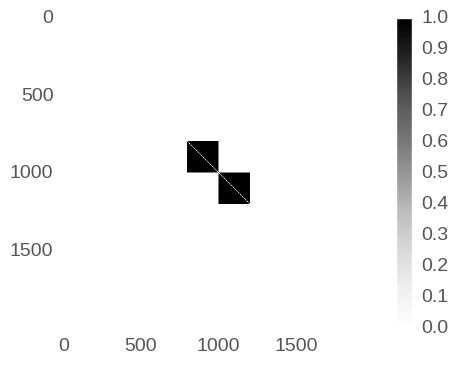

In [5]:
plt.imshow(gpu.connIIg2 + gpu.connIIg1)
plt.colorbar()

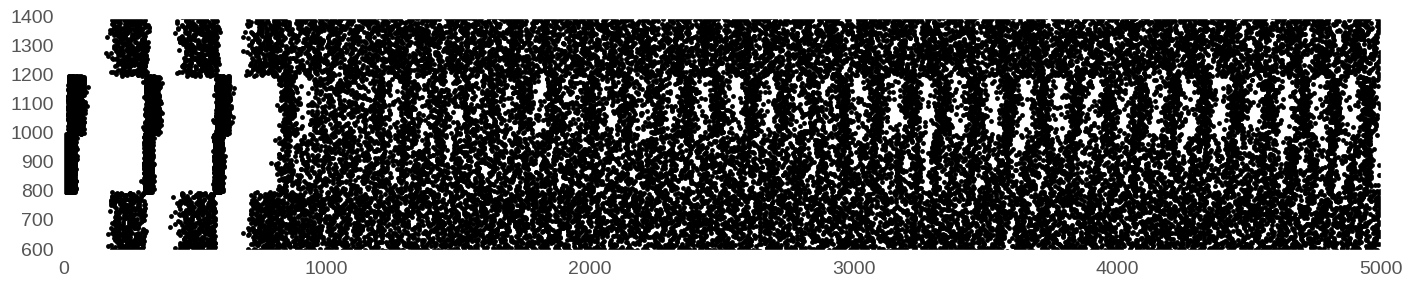

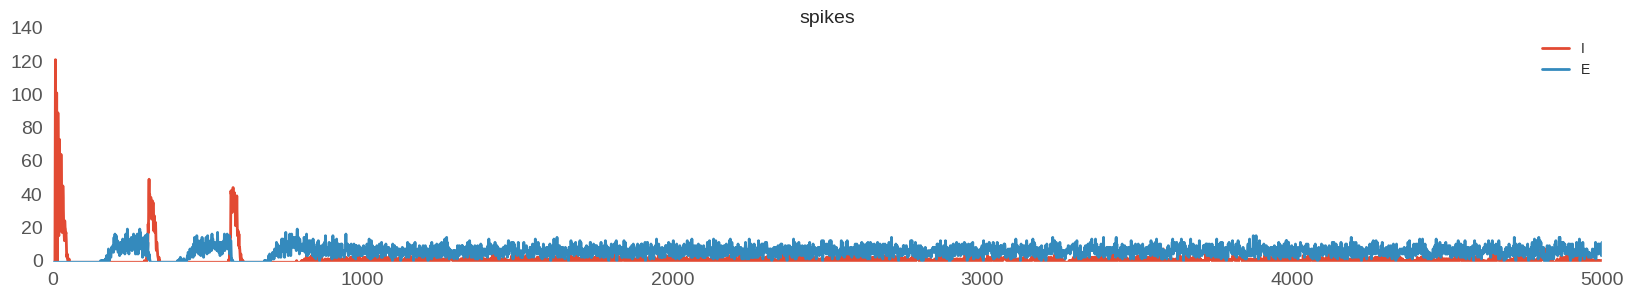

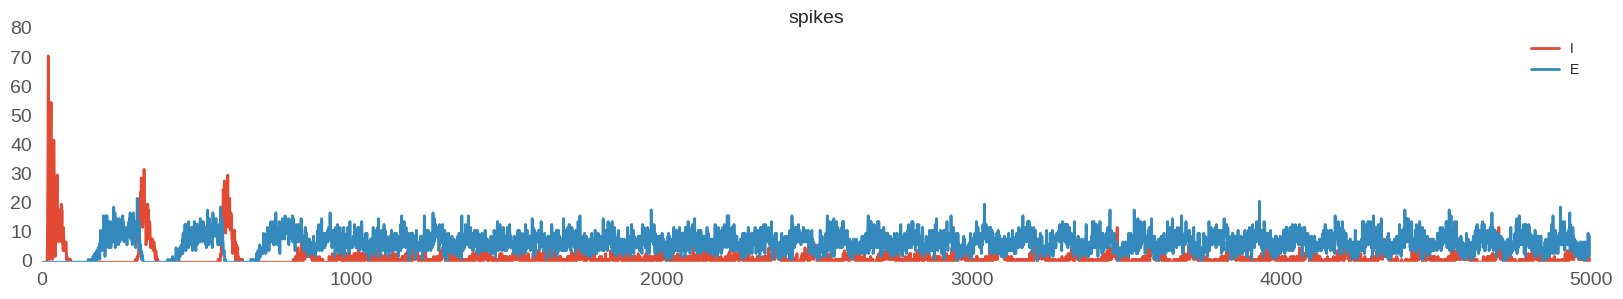

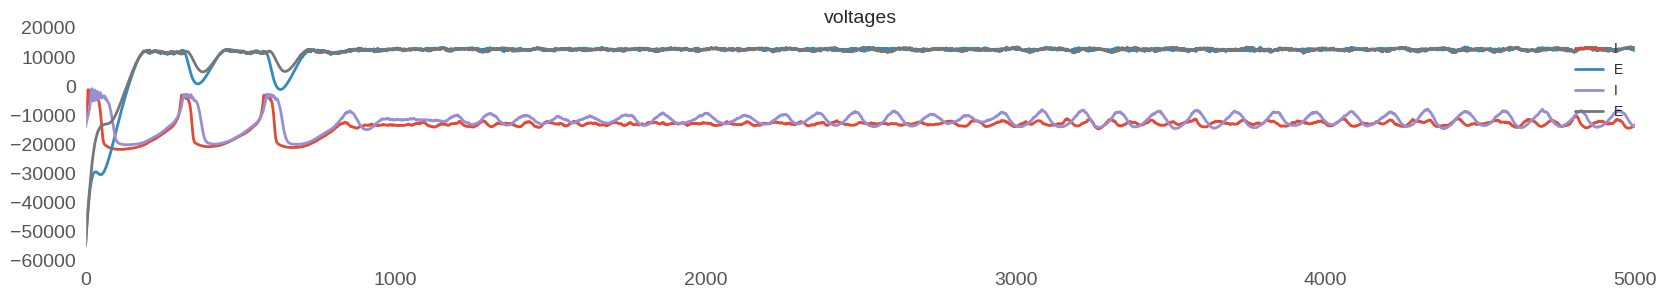

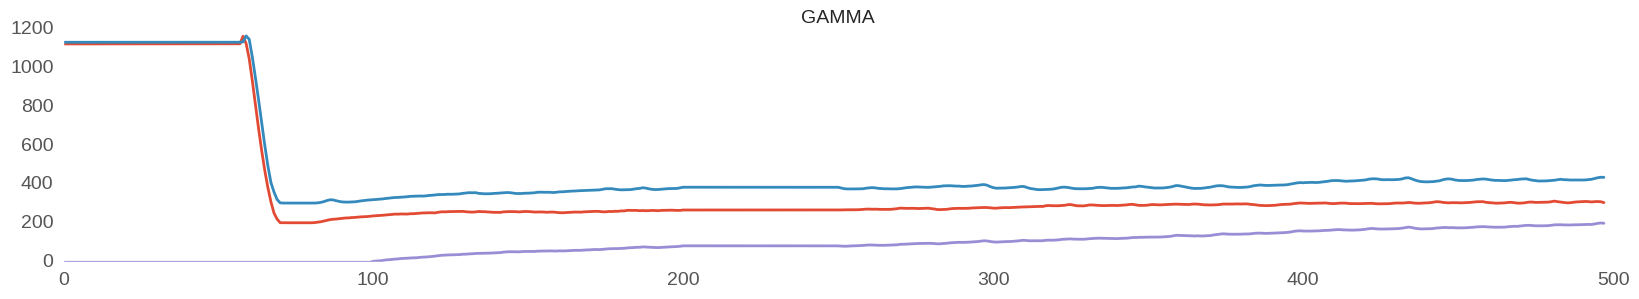

In [6]:
# plotRaster(gpu.raster)
# plt.xlim([T-1000,T])
# plt.ylim([900,910])
# f()

plotRaster(gpu.raster)
# plt.xlim([T//2-1000,T//2+1000])
# plt.xlim([T-1000,T])
plt.ylim([600,1400])
# f()
# plt.plot(gpu.icmI, label='I')
# plt.plot(gpu.icmE, label='E')
# plt.title('v')
# plt.legend()

f()
plt.plot((gpu.vvmI1), label='I')
plt.plot((gpu.vvmE1), label='E')
plt.title('spikes')
plt.legend()

f()
plt.plot((gpu.vvmI2), label='I')
plt.plot((gpu.vvmE2), label='E')
plt.title('spikes')
plt.legend()

f()
plt.plot((gpu.vmI1), label='I')
plt.plot((gpu.vmE1), label='E')

plt.plot((gpu.vmI2), label='I')
plt.plot((gpu.vmE2), label='E')
plt.title('voltages')
plt.legend()

# # f()
# plt.plot(np.arange(0,len(gpu.gamma)*10,10),norm(gpu.gamma*200))
# plt.title('GAMMA')

# f()
# plt.plot(gpu.vvmI, label='I')
# plt.plot(gpu.vvmE, label='E')
# plt.title('spikes')
# plt.legend()

f()
plt.plot(gpu.gm1[:-2])
plt.plot(gpu.gm2[:-2])
plt.plot(gpu.gmS[:-2])
plt.title('GAMMA')
# f()
# plt.plot(gpu.Am[20:])
# plt.title('Dep')

# f()
# plt.plot(gpu.Bm[20:])
# plt.title('Pot')

